# Sourcing and analyzing time-series data

# 1. Importing libraries and data

# The data set I chose is dealing with customer connection and the number of new and used vehicle sales sold by month which occurred in the state of Maryland.  I focused on total new vehicle sales each month from years 2002 to 2023.  

# The source the data came from is from Data.gov this is a non-Federal datset, however, the data is updated in real time.  

# https://catalog.data.gov/dataset/mva-vehicle-sales-counts-by-month-for-calendar-year-2002-2020-up-to-october

# A description of the columns.  There are six columns, Year, Month, New, Used, Total Sales New and Total Sales Used.

# The year and month columns are the number of vehicles and when the sales for the new and used vehicle sales happened.

# New is the number of new vehicles were sold in a month of the year.

# Used is the number of used vehicles were sold in a month of the year.

# Total sales new is the total sales of the new vehicles in a month of the year.

# Total sales used is the total sales of the used vehicles in a month of the year. 

In [ ]:
# Before I start this analysis, I'll need a new library I haven't installed before—Quandl. Install Quandl using conda

conda install quandl

In [1]:
conda install quandl

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0




In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

# Importing data set

In [3]:
path = r'D:\Rich\Bus Analyst\1-2-2024 Airline Delays'

In [4]:
df_mva_vehicle_sales = pd.read_csv(os.path.join(path,'02 Data','Original Data','MVA_Vehicle_Sales_Counts_by_Month_for_Calendar_Year_2002_through_December_2023.csv'))

In [ ]:
# Basic checks

In [ ]:
# df_mva_vehicle_sales.head(10)
# df_mva_vehicle_sales.tail(15)
# df_mva_vehicle_sales.columns
# df_mva_vehicle_sales.shape
# df_mva_vehicle_sales.info()
# df_mva_vehicle_sales.describe()

In [5]:
df_mva_vehicle_sales.head(10)

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,755015820,386481929
1,2002,FEB,27520,50982,664454223,361353242
2,2002,MAR,34225,58794,805666244,419385387
3,2002,APR,36452,59817,846368297,433061150
4,2002,MAY,37359,60577,855005784,442569410
5,2002,JUN,36348,55415,830251613,414731166
6,2002,JUL,30367,55235,700530891,384673023
7,2002,AUG,38965,60310,934484212,455453720
8,2002,SEP,39740,55485,950502055,432112270
9,2002,OCT,35276,58020,865326154,456738532


In [6]:
df_mva_vehicle_sales.tail(15)

,Year,Month,New,Used,Total Sales New,Total Sales Used
249,2022,OCT,22255,47325,1060091844,804805365
250,2022,NOV,21117,43345,993531237,734729853
251,2022,DEC,23025,40906,1120587035,718545405
252,2023,JAN,21037,45543,992034915,762502754
253,2023,FEB,20893,44320,960384917,712901541
254,2023,MAR,28023,53557,1245687446,872419947
255,2023,APR,25918,48230,1136414635,775889223
256,2023,MAY,28372,51416,1234582275,855515371
257,2023,JUN,27001,50613,1214340987,814275863
258,2023,JUL,26360,49502,1196918451,887723892


In [7]:
df_mva_vehicle_sales.columns

Index(['Year ', 'Month ', 'New', 'Used', 'Total Sales New',
       'Total Sales Used'],
      dtype='object')

In [8]:
df_mva_vehicle_sales.shape

(264, 6)

In [9]:
df_mva_vehicle_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              264 non-null    int64 
 1   Month             264 non-null    object
 2   New               264 non-null    int64 
 3   Used              264 non-null    int64 
 4   Total Sales New   264 non-null    int64 
 5   Total Sales Used  264 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 12.5+ KB


In [10]:
df_mva_vehicle_sales.describe()

,Year,New,Used,Total Sales New,Total Sales Used
count,264.000000,264.000000,264.000000,2.640000e+02,2.640000e+02
mean,2012.500000,28127.643939,55426.602273,8.681067e+08,5.587321e+08
std,6.356339,5706.437162,7706.678721,1.715362e+08,1.525242e+08
min,2002.000000,13700.000000,29420.000000,4.051891e+08,2.955220e+08
25%,2007.000000,23848.500000,50090.750000,7.466069e+08,4.395213e+08
50%,2012.500000,27718.500000,55983.500000,8.883341e+08,5.140906e+08
75%,2018.000000,31473.250000,61022.000000,9.860432e+08,6.919647e+08
max,2023.000000,45547.000000,73163.000000,1.295820e+09,9.347858e+08


# 3. Make a subset of your data if necessary. 

# Subset is necessary.  No forecasted data in data set.

In [11]:
# Created at 'Date' column that included year,month, and day to create 'datetime' which is needed to build the line chart

df_mva_vehicle_sales['Date'] = pd.to_datetime(df_mva_vehicle_sales['Year '].astype(str) +'-'+ df_mva_vehicle_sales['Month ']+'-'+'01')

In [12]:
df_mva_vehicle_sales.head(5)

,Year,Month,New,Used,Total Sales New,Total Sales Used,Date
0,2002,JAN,31106,49927,755015820,386481929,2002-01-01
1,2002,FEB,27520,50982,664454223,361353242,2002-02-01
2,2002,MAR,34225,58794,805666244,419385387,2002-03-01
3,2002,APR,36452,59817,846368297,433061150,2002-04-01
4,2002,MAY,37359,60577,855005784,442569410,2002-05-01


In [ ]:
# Subsetting to remove unnecessary columns 'Year', 'Month', 'New', 'Used' and 'Total Sales Used'

In [13]:
df_mva_vehicle_sales = df_mva_vehicle_sales.drop(columns = ['Year ', 'Month ', 'New','Used', 'Total Sales Used'])

In [14]:
df_mva_vehicle_sales.head(5)

,Total Sales New,Date
0,755015820,2002-01-01
1,664454223,2002-02-01
2,805666244,2002-03-01
3,846368297,2002-04-01
4,855005784,2002-05-01


In [15]:
df_mva_vehicle_sales_2 = df_mva_vehicle_sales[['Date','Total Sales New',]]

In [16]:
df_mva_vehicle_sales_2.head(5)

,Date,Total Sales New
0,2002-01-01,755015820
1,2002-02-01,664454223
2,2002-03-01,805666244
3,2002-04-01,846368297
4,2002-05-01,855005784


# 3 A. 	Subset 'df_mva_vehicle_sales_2' created in order to create the line chart.  The variables used is 'Total Sales New'.  Using these data points will let us know if there was an increase or decrease of new sales in dollars.

# 4. Create a line chart of your data

In [ ]:
# Created 'datetime' to change numberical index in order for the plot to work

In [17]:
# Set the "Date" column as the index

from datetime import datetime

df_mva_vehicle_sales_2['datetime'] = pd.to_datetime(df_mva_vehicle_sales_2['Date']) # Create a datetime column from "Date.""
df_mva_vehicle_sales_2 = df_mva_vehicle_sales_2.set_index('datetime') # Set the datetime as the index of the dataframe.
df_mva_vehicle_sales_2.head()

,Date,Total Sales New
datetime,,
2002-01-01,2002-01-01,755015820
2002-02-01,2002-02-01,664454223
2002-03-01,2002-03-01,805666244
2002-04-01,2002-04-01,846368297
2002-05-01,2002-05-01,855005784


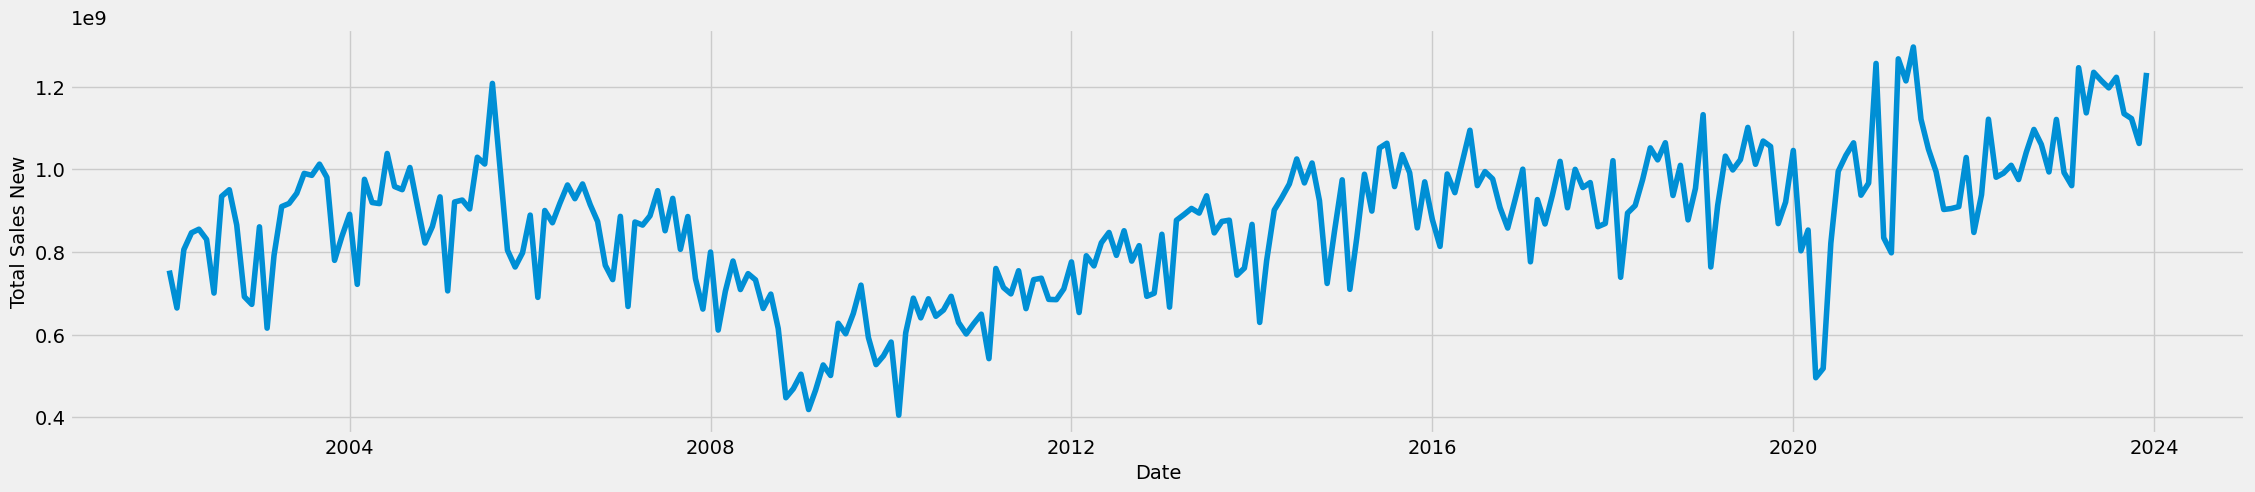

In [18]:
plt.figure(figsize=(25,5), dpi=100)
sns.lineplot(x = 'Date', y = 'Total Sales New', data=df_mva_vehicle_sales_2)
plt.show()

# 5 Decompose the data's components

In [19]:
df_mva_vehicle_sales_2.head(5)

,Date,Total Sales New
datetime,,
2002-01-01,2002-01-01,755015820
2002-02-01,2002-02-01,664454223
2002-03-01,2002-03-01,805666244
2002-04-01,2002-04-01,846368297
2002-05-01,2002-05-01,855005784


In [20]:
df_mva_vehicle_sales_2.tail(5)

,Date,Total Sales New
datetime,,
2023-08-01,2023-08-01,1222581892
2023-09-01,2023-09-01,1134437699
2023-10-01,2023-10-01,1122680147
2023-11-01,2023-11-01,1062465105
2023-12-01,2023-12-01,1233234965


In [21]:
df_mva_vehicle_sales_2 = df_mva_vehicle_sales_2.drop(columns = ['Date'])

In [22]:
df_mva_vehicle_sales_2.head(5)

,Total Sales New
datetime,
2002-01-01,755015820
2002-02-01,664454223
2002-03-01,805666244
2002-04-01,846368297
2002-05-01,855005784


In [23]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_mva_vehicle_sales_2, model='additive')

In [24]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

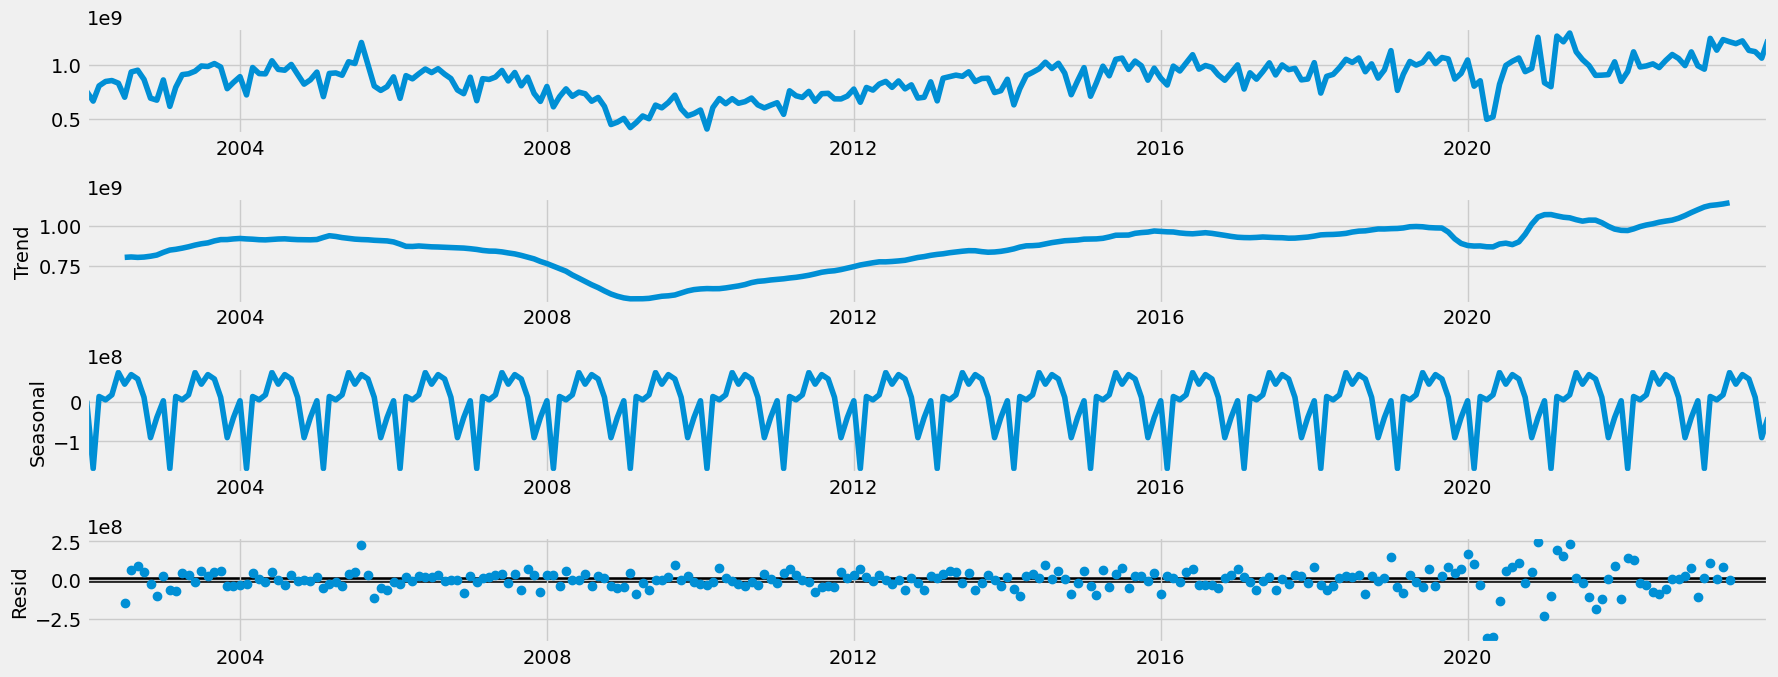

In [25]:
# Plot the separate components

decomposition.plot()
plt.show()

# 5A. Analyze the results from the plot in a markdown cell.

 # As I look at the results, the top chart, which is called the level, includes all of the components, such as, fluctuations, noise etc. Here you can see there was an increase in sales revenue in 2004 from \\$891,062,280 to \\$1,038,212,129 and decrease revenue to \\$447,337,415 in sales in 2008. Then sales increased between 2011 to 2015 and sales were averaging \\$827,343,751. In 2020 a sharp decrease in sales and then a sales quickly increased to \\$1,063,945,651 and sales retracted back to \\$966,657,333.

# Then the next chart, called trend, has less noise and therefore is not smoothed data. Here it is easier to see how new vehicles sales have fluctuated over time. Over the time frame of this data, new vehicles sales are higher after 2020 than the revenue from new vehicles from 2004. 

# The third chart down is called seasonality. The seasonal pattern shows that new vehicles sold are lowest in the first quarter of the year then peak during the summer months, then decline in the fall with a slight increase towards the end of the year. This pattern is repeated for each year. The marketing team should consider doing a 'New Year' promotional to encourage more new vehicles to be purchased through the end of the year and help to increase sales of new vehicles being purchased in the first quarter of the new year. Then analyze the results to see if a promotion will help improve revenue of first quarter new vehicle purchases.     

# Finally, the last chart is called residual. This shows what is left after the trend and seasonality have been removed. Here the data seems constant until the 2020 where more fluctuations appear, which correlates with the increase in sales of new vehicles being sold in both the level and trend charts.


# 6 Conduct a Dickey-Fuller test to check for stationary.

# Checking autocorrelation prior to performing the Dickey-Fuller test

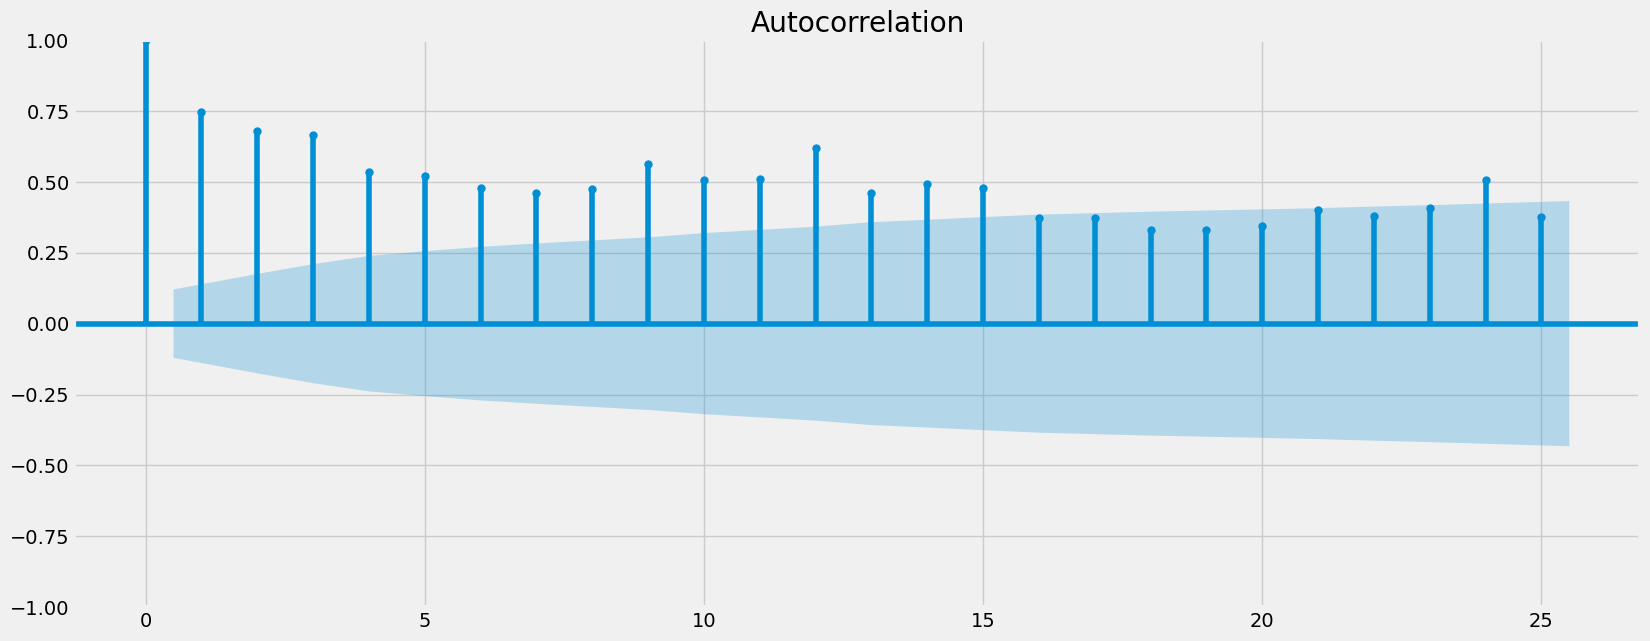

In [26]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_mva_vehicle_sales_2)
plt.show()

In [27]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_mva_vehicle_sales_2['Total Sales New'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.953598
p-value                          0.769810
Number of Lags Used             16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


# 6A. Interpret the results in a markdown cell and reference your null hypothesis. 

# The test statistic is the direct result of the statistical test. The test statistic is -0.953598.

# The p-value indicates if the test result is significant.  A p-value less than 0.05 would be significant. The p-value on this test is 0.769810, which is not significant.

# The critical values cooresponds to the different significant levels.  
# Critical value (1%) = -3.457105
# Critical value (5%) = -2.873314
# Critical value (10%) = -2.573044

# Since the test statistic is -0.953598 and is larger than the critical values, the null hypothesis cannot be rejected. 

# This means the data is non-stationary.

# 7. Data non-stationary, conduct a round of differncing.

In [28]:
data_diff = df_mva_vehicle_sales_2 - df_mva_vehicle_sales_2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [29]:
data_diff.dropna(inplace = True) # Here, I removed the missing values that came about as a result of the differencing. 
# I need to remove these or I won't be able to run the Dickey-Fuller test.

In [30]:
data_diff.head()

,Total Sales New
datetime,
2002-02-01,-90561597.0
2002-03-01,141212021.0
2002-04-01,40702053.0
2002-05-01,8637487.0
2002-06-01,-24754171.0


In [31]:
data_diff.columns

Index(['Total Sales New'], dtype='object')

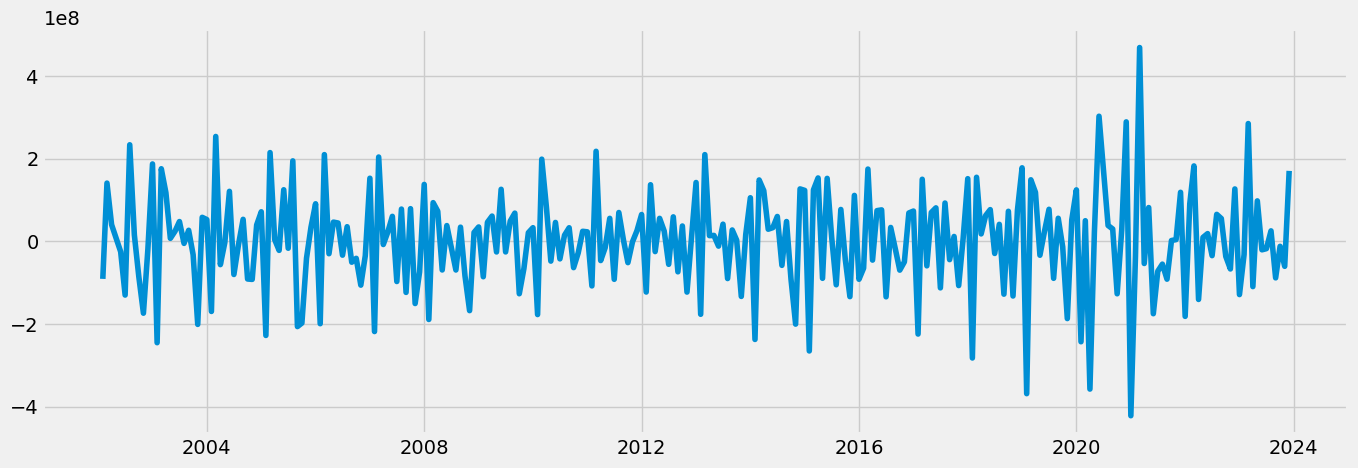

In [32]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [33]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.196499
p-value                          0.000668
Number of Lags Used             15.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


# 9. Check your data’s autocorrelations.

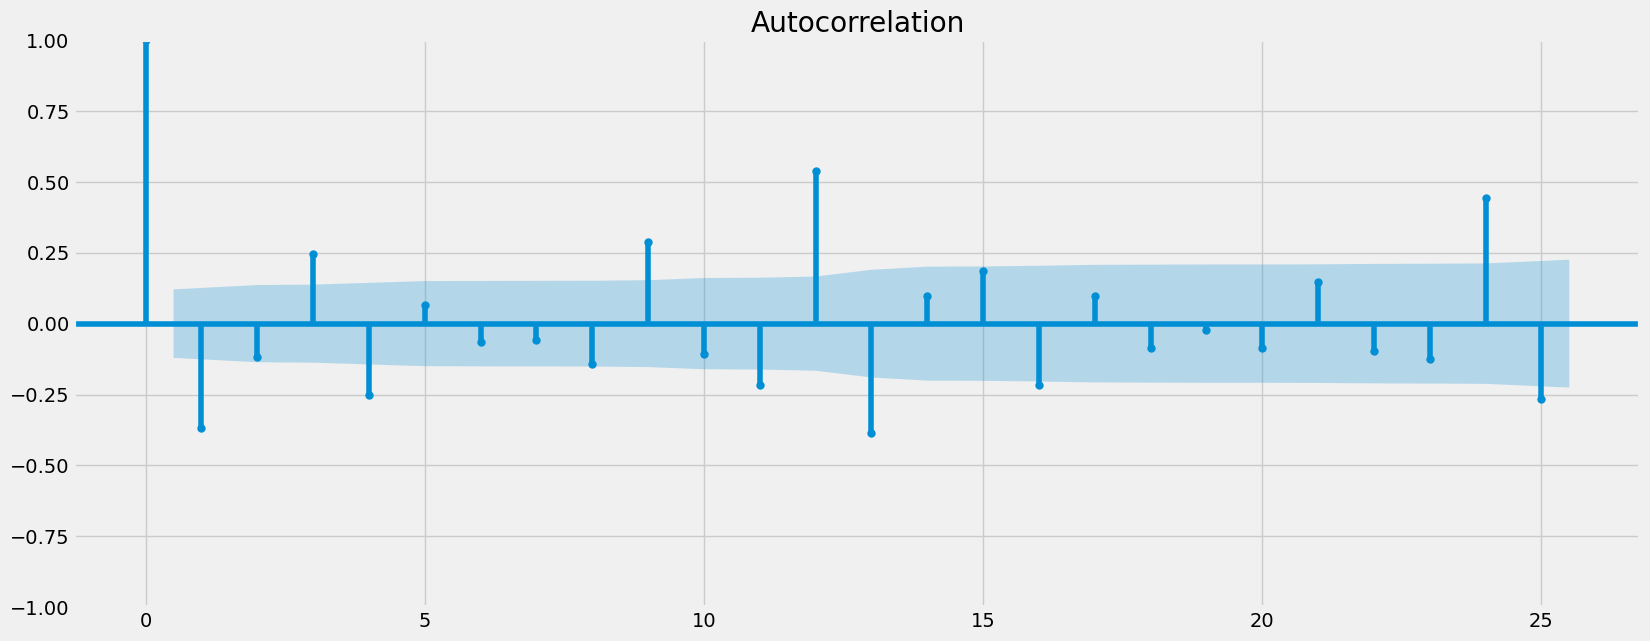

In [34]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()

# 9. When the vertical lines, which represents the lags, go above the blue edge of the confidence interval, this means the lags are significantly correlated with the blue confidence interval.

# Since there are several lags beyond the interval, this shows the data is non-stationary.  This also supports the results of the Dickey-Fuller test conducted.

# 10. Export 'df_mva_vehicle_sales' as 'df_mva_vehicle_sales_2_time_series.csv' in Prepared Data

In [35]:
df_mva_vehicle_sales.to_csv(os.path.join(path,'02 Data', 'Prepared Data','df_mva_vehicle_sales_2_time_series.csv'))